In [1]:
 #乱数シードの固定

import os
import random
import numpy as np
import torch

SEED_VALUE = 1234  # これはなんでも良い
os.environ['PYTHONHASHSEED'] = str(SEED_VALUE)
random.seed(SEED_VALUE)
np.random.seed(SEED_VALUE)
torch.manual_seed(SEED_VALUE)  # PyTorchを使う場合


In [2]:
# GPUの使用確認：True or False
torch.cuda.is_available()

# TrueならGPU使用可能

True

In [3]:
# Livedoorニュースのファイルをダウンロード
! wget "https://www.rondhuit.com/download/ldcc-20140209.tar.gz"

--2023-05-20 12:32:49--  https://www.rondhuit.com/download/ldcc-20140209.tar.gz
Resolving www.rondhuit.com (www.rondhuit.com)... 59.106.19.174
Connecting to www.rondhuit.com (www.rondhuit.com)|59.106.19.174|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8855190 (8.4M) [application/x-gzip]
Saving to: ‘ldcc-20140209.tar.gz’

ldcc-20140209.tar.g 100%[===================>]   8.44M  2.36MB/s    in 3.6s    

2023-05-20 12:32:53 (2.36 MB/s) - ‘ldcc-20140209.tar.gz’ saved [8855190/8855190]



In [4]:
# ファイルを解凍し、カテゴリー数と内容を確認
import tarfile
import os

# 解凍
tar = tarfile.open("ldcc-20140209.tar.gz", "r:gz")
tar.extractall("./data/livedoor/")
tar.close()

# フォルダのファイルとディレクトリを確認
files_folders = [name for name in os.listdir("./data/livedoor/text/")]
print(files_folders)

# カテゴリーのフォルダのみを抽出
categories = [name for name in os.listdir(
    "./data/livedoor/text/") if os.path.isdir("./data/livedoor/text/"+name)]

print("カテゴリー数:", len(categories))
print(categories)

['it-life-hack', 'smax', 'peachy', 'topic-news', 'livedoor-homme', 'README.txt', 'dokujo-tsushin', 'sports-watch', 'movie-enter', 'kaden-channel', 'CHANGES.txt']
カテゴリー数: 9
['it-life-hack', 'smax', 'peachy', 'topic-news', 'livedoor-homme', 'dokujo-tsushin', 'sports-watch', 'movie-enter', 'kaden-channel']


In [5]:
# ファイルの中身を確認してみる
file_name = "./data/livedoor/text/movie-enter/movie-enter-6255260.txt"

with open(file_name) as text_file:
    text = text_file.readlines()
    print("0：", text[0])  # URL情報
    print("1：", text[1])  # タイムスタンプ
    print("2：", text[2])  # タイトル
    print("3：", text[3])  # 本文

    # 今回は4要素目には本文は伸びていないが、4要素目以降に本文がある場合もある

0： http://news.livedoor.com/article/detail/6255260/

1： 2012-02-07T09:00:00+0900

2： 新しいヴァンパイアが誕生！　ジョニデ主演『ダーク・シャドウ』の公開日が決定

3： 　こんなヴァンパイアは見たことがない！　ジョニー・デップとティム・バートン監督がタッグを組んだ映画『ダーク・シャドウズ（原題）』の邦題が『ダーク・シャドウ』に決定。日本公開日が5月19日に決まった。さらに、ジョニー・デップ演じるヴァンパイアの写真が公開された。



In [6]:

# 本文を取得する前処理関数を定義


def extract_main_txt(file_name):
    with open(file_name) as text_file:
        # 今回はタイトル行は外したいので、3要素目以降の本文のみ使用
        text = text_file.readlines()[3:]

        # 3要素目以降にも本文が入っている場合があるので、リストにして、後で結合させる
        text = [sentence.strip() for sentence in text]  # 空白文字(スペースやタブ、改行)の削除
        text = list(filter(lambda line: line != '', text))
        text = ''.join(text)
        text = text.translate(str.maketrans(
            {'\n': '', '\t': '', '\r': '', '\u3000': ''}))  # 改行やタブ、全角スペースを消す
        return text

In [7]:
# リストに前処理した本文と、カテゴリーのラベルを追加していく
import glob

list_text = []
list_label = []

for cat in categories:
    text_files = glob.glob(os.path.join("./data/livedoor/text", cat, "*.txt"))

    # 前処理extract_main_txtを実施して本文を取得
    body = [extract_main_txt(text_file) for text_file in text_files]

    label = [cat] * len(body)  # bodyの数文だけカテゴリー名のラベルのリストを作成

    list_text.extend(body)  # appendが要素を追加するのに対して、extendはリストごと追加する
    list_label.extend(label)

In [8]:
# 0番目の文章とラベルを確認
print(list_text[0])
print(list_label[0])


自宅のインターネット環境は光回線でPCとブロードバンドルーターは有線で接続している人、4月からの新生活でPCのネット回線は確保したけどスマホやタブレット用のWiFiまでは手が回らないというような人に朗報だ。無線LAN親機にもなる超小型無線LANアダプターが登場した。アイ・オー・データ機器から登場した無線LANアダプター「WN-G150UMシリーズ」は、USB接続タイプの超小型アダプターだ。USBポートに本体を接続した場合でも外に出っ張る部分はわずか約5.4ミリほどである。これだけなら、超小型の無線LANアダプターというだけで終わってしまうがWN-G150UMシリーズは、無線LANの親機として使えるモードが用意されている。具体的には、有線LANでインターネットに接続されているPCがあって、そのPCにWN-G150UMシリーズを装着するとそのPCが無線LANアクセスポイントになる。例えば一人暮らしで自宅では有線LANで一台のPCを接続しているようなケースでスマホやゲーム機を持っているような場合、PCを無線LANアクセスポイントにすることができれば、わざわざお金を出して無線LANアクセスポイントを購入し、無線LAN環境をセットアップする手間が省ける。また、外出中はPCの電源を切っておくことができるので、万が一の無線LANのタダ乗りを防ぐことも可能だ。加えて値段も1360円と激安だ。USBポートを持つWindows PCであればデスクトップPCでも利用できるので、いままで自宅では有線LAN環境を構築していたが無線化したいという場合でも各デスクトップにWN-G150UMシリーズを装着して無線化してしまうといったことも手軽でなおかつ安価に行える。出荷は4月中旬で色は黒と白が用意されている。製品名：WN-G150UMW（白）型番：WN-G150UMW発売時期：4月中旬予想市場価格：1360円製品名：WN-G150UMK（黒）型番：WN-G150UMK発売時期：4月中旬予想市場価格：1360円■製品情報■アイ・オー・データ機器I-O DATA nテクノロジー対応 150Mbps(規格値) ポケットルーター ブラック WN-G150TRKクチコミを見る
it-life-hack


In [9]:
# pandasのDataFrameにする
import pandas as pd

df = pd.DataFrame({'text': list_text, 'label': list_label})

# 大きさを確認しておく（7,376文章が存在）
print(df.shape)

df.head()

(7376, 2)


,text,label
0,自宅のインターネット環境は光回線でPCとブロードバンドルーターは有線で接続している人、4月か...,it-life-hack
1,デジタル一眼レフカメラは高画質で綺麗な写真を撮れるが、ボディが大きくて重たく、交換レンズも一...,it-life-hack
2,ノートパソコンのスピーカーからの音は、どれもいまいちなのが一般的だ。アップルの製品に関しても...,it-life-hack
3,この写真を見て「ああ例のアレか」とピンと来た人は、相当のハードウェアマニアだろう。何かといえ...,it-life-hack
4,日本には遅れて参入してきた実名SNS「Facebook」。利用者がどんどん伸び、日本で最大の...,it-life-hack


In [10]:
# カテゴリーの辞書を作成
dic_id2cat = dict(zip(list(range(len(categories))), categories))
dic_cat2id = dict(zip(categories, list(range(len(categories)))))

print(dic_id2cat)
print(dic_cat2id)

# DataFrameにカテゴリーindexの列を作成
df["label_index"] = df["label"].map(dic_cat2id)
df.head()

# label列を消去し、text, indexの順番にする
df = df.loc[:, ["text", "label_index"]]
df.head()

{0: 'it-life-hack', 1: 'smax', 2: 'peachy', 3: 'topic-news', 4: 'livedoor-homme', 5: 'dokujo-tsushin', 6: 'sports-watch', 7: 'movie-enter', 8: 'kaden-channel'}
{'it-life-hack': 0, 'smax': 1, 'peachy': 2, 'topic-news': 3, 'livedoor-homme': 4, 'dokujo-tsushin': 5, 'sports-watch': 6, 'movie-enter': 7, 'kaden-channel': 8}


,text,label_index
0,自宅のインターネット環境は光回線でPCとブロードバンドルーターは有線で接続している人、4月か...,0
1,デジタル一眼レフカメラは高画質で綺麗な写真を撮れるが、ボディが大きくて重たく、交換レンズも一...,0
2,ノートパソコンのスピーカーからの音は、どれもいまいちなのが一般的だ。アップルの製品に関しても...,0
3,この写真を見て「ああ例のアレか」とピンと来た人は、相当のハードウェアマニアだろう。何かといえ...,0
4,日本には遅れて参入してきた実名SNS「Facebook」。利用者がどんどん伸び、日本で最大の...,0


In [11]:
# 順番をシャッフルする
df = df.sample(frac=1, random_state=123).reset_index(drop=True)
df.head()

,text,label_index
0,26日深夜放送、TBS「S1」では、紆余曲折を経て、4月12日のセ・パ同時開幕が決まったプロ...,6
1,23日放送、フジテレビ「5LDK」には、ボクシング現WBA世界バンタム級王者・亀田興毅が出演...,6
2,27日、東電による電気料金値上げの会見の様子をメディア各社が報じているが、その際の発言が酷す...,3
3,4日、日刊スポーツは、ヤクルトスワローズがアメーバブログの運営でもお馴染み、サイバーエージェ...,6
4,デザイン会社に勤務するマスミさん（27歳）の楽しみは、１ヶ月に１回の「社内おやつ」の買い出し...,5


In [12]:
# tsvファイルで保存する

# 全体の2割の文章数
len_0_2 = len(df) // 5

# 前から2割をテストデータとする
df[:len_0_2].to_csv("./test.tsv", sep='\t', index=False, header=None)
print(df[:len_0_2].shape)

# 前2割からを訓練&検証データとする
df[len_0_2:].to_csv("./train_eval.tsv", sep='\t', index=False, header=None)
print(df[len_0_2:].shape)

(1475, 2)
(5901, 2)


In [13]:
# tsvファイルをダウンロードしたい場合
from google.colab import files

# ダウンロードする場合はコメントを外す
# 少し時間がかかる（4MB）
# files.download("./test.tsv")


# ダウンロードする場合はコメントを外す
# 少し時間がかかる（18MB）
# files.download("./train_eval.tsv")


In [14]:
# MeCabとtransformersの用意
!apt install aptitude swig
!aptitude install mecab libmecab-dev mecab-ipadic-utf8 git make curl xz-utils file -y
!pip install mecab-python3
!pip install transformers

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  aptitude-common libcgi-fast-perl libcgi-pm-perl libclass-accessor-perl
  libcwidget4 libencode-locale-perl libfcgi-perl libhtml-parser-perl
  libhtml-tagset-perl libhttp-date-perl libhttp-message-perl libio-html-perl
  libio-string-perl liblocale-gettext-perl liblwp-mediatypes-perl
  libparse-debianchangelog-perl libsigc++-2.0-0v5 libsub-name-perl liburi-perl
  libxapian30 swig4.0
Suggested packages:
  aptitude-doc-en | aptitude-doc apt-xapian-index debtags tasksel
  libcwidget-dev libdata-dump-perl libhtml-template-perl libxml-simple-perl
  libwww-perl xapian-tools swig-doc swig-examples swig4.0-examples swig4.0-doc
The following NEW packages will be installed:
  aptitude aptitude-common libcgi-fast-perl libcgi-pm-perl
  libclass-accessor-perl libcwidget4 libencode-locale-perl libfcgi-perl
  libhtml-parser-perl libhtml-tagset-perl libht

In [15]:
pip install fugashi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 599.9/599.9 kB 11.1 MB/s eta 0:00:00


In [16]:
pip install ipadic dictionary

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 104.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 447.3/447.3 kB 48.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for ipadic: filename=ipadic-1.0.0-py3-none-any.whl size=13556703 sha256=410e0719ce3f89ca4d204271e1310a56a1b6235e0cf61d1938440036f23a4525
  Stored in directory: /root/.cache/pip/wheels/5b/ea/e3/2f6e0860a327daba3b030853fce4483ed37468bbf1101c59c3
  Created wheel for dictionary: filename=dictionary-1.0-py3-none-any.whl size=447645 sha256=391a5a7b0bb5f860116a7c3c52b404e44573a5e56db08eba61b5f351aad3f843
  Stored in directory: /root/.cache/pip/wheels/b7/84/61/e002e804202156174a076efcb9d107c43ef0a866b853e8c19f
Successfully built ipadic dictionary


In [17]:
import torch
import torchtext  # torchtextを使用
from transformers import BertJapaneseTokenizer, TFBertModel
#from transformers.tokenization_bert_japanese import BertJapaneseTokenizer

# 日本語BERTの分かち書き用tokenizerです
tokenizer = BertJapaneseTokenizer.from_pretrained('cl-tohoku/bert-base-japanese-whole-word-masking')


In [18]:
import pandas as pd
import re

# URLパターンの定義
url_pattern = r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'

# 'text'列からURLを削除
df['text'] = df['text'].apply(lambda x: re.sub(url_pattern, '', x))


In [19]:
df['text'][0]

'26日深夜放送、TBS「S1」では、紆余曲折を経て、4月12日のセ・パ同時開幕が決まったプロ野球界について、野球解説者・野村克也氏がコメントを述べた。「我々が現役の時から、セとパがいがみ合うといったら言い方が悪いんですけど、そんな感じがしてたんですよ。日本シリーズとかオールスターとか、リーグを代表しているものはむき出しにしてやればいいので、試合を離れたら両リーグとも手を取り合っていい方向に進むという、そういう風にプロ野球はあって貰いたい」と語る野村氏。また、「組織というのは、ピラミッドっていうのが理想なんですから、トップがしっかりしてれば、少年野球、高校野球は始まってますけど、そういう底辺まで意思が通っているという、そういう組織を作り上げて貰いたい。特にプロ野球のコミッショナーはもっと権限を持ってほしい。足りない気がしますよ。選手の意見を聞いてとかなんとかって、コミッショナーなんだから、自分で“こうせいああせい”でいいと思うんですけどね」と訴える野村氏だった。'

In [20]:
# データを読み込んだときに、読み込んだ内容に対して行う処理を定義します

#from torchtext.legacy.data import Field
max_length = 512  # 東北大学_日本語版の最大の単語数（サブワード数）は512


def tokenizer_512(input_text):
    """torchtextのtokenizerとして扱えるように、512単語のpytorchでのencodeを定義。ここで[0]を指定し忘れないように"""
    return tokenizer.encode(input_text, max_length=512, return_tensors='pt')[0]


# テキストデータとラベルデータを抽出
X = df['text'].values
y = df['label_index'].values

In [21]:
!cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 63
model name	: Intel(R) Xeon(R) CPU @ 2.30GHz
stepping	: 0
microcode	: 0xffffffff
cpu MHz		: 2299.998
cache size	: 46080 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 avx2 smep bmi2 erms invpcid xsaveopt arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs mmio_stale_data retbleed
bogomips	: 4599.99
clflush size	: 64
cache_alignment	: 64
address sizes	: 46 bits physical, 48 bits virtua

In [22]:
!nvidia-smi

Sat May 20 12:45:55 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P8     9W /  70W |      3MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [33]:
import pandas as pd
import numpy as np
import torch
from transformers import BertTokenizer, BertModel
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset
from torch.optim import Adam
import torch.nn as nn
from torch.nn import CrossEntropyLoss

# GPUが利用可能かどうかの確認
print("GPU Availability: ", torch.cuda.is_available())
assert torch.cuda.is_available()

# データを訓練用とテスト用に分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# トークナイザーの読み込み
tokenizer = BertTokenizer.from_pretrained('cl-tohoku/bert-base-japanese-whole-word-masking')


The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'BertJapaneseTokenizer'. 
The class this function is called from is 'BertTokenizer'.


GPU Availability:  True


In [34]:
encoded_train = tokenizer.batch_encode_plus(
    X_train,
    add_special_tokens=True,
    max_length=512,
    padding='max_length',
    truncation=True,
    return_attention_mask=True,
    return_tensors='pt'
)
input_ids_train = encoded_train['input_ids']
attention_mask_train = encoded_train['attention_mask']

encoded_test = tokenizer.batch_encode_plus(
    X_test,
    add_special_tokens=True,
    max_length=512,
    padding='max_length',
    truncation=True,
    return_attention_mask=True,
    return_tensors='pt'
)
input_ids_test = encoded_test['input_ids']
attention_mask_test = encoded_test['attention_mask']

In [36]:
# BERTモデルの読み込み
bert_model = BertModel.from_pretrained('cl-tohoku/bert-base-japanese-whole-word-masking')


Some weights of the model checkpoint at cl-tohoku/bert-base-japanese-whole-word-masking were not used when initializing BertModel: ['cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
# # BERT本体の全層をフリーズ
# for param in bert_model.parameters():
#     param.requires_grad = False

# # 最終層のみをアンフリーズ
# for param in bert_model.encoder.layer[-1].parameters():
#     param.requires_grad = True

In [37]:
# モデルの構築
class BertClassifier(nn.Module):
    def __init__(self, bert_model):
        super().__init__()
        self.bert_model = bert_model
        self.out = nn.Linear(bert_model.config.hidden_size, 9)

    def forward(self, input_ids, attention_mask):
        outputs = self.bert_model(input_ids=input_ids, attention_mask=attention_mask)
        logits = self.out(outputs.pooler_output)
        return logits

model = BertClassifier(bert_model).to('cuda')

# モデルのコンパイル
optimizer = Adam(model.parameters(), lr=2e-5)
loss_fn = CrossEntropyLoss()

# Tensorをデータローダーに設定
train_data = TensorDataset(input_ids_train, attention_mask_train, torch.tensor(y_train))
test_data = TensorDataset(input_ids_test, attention_mask_test, torch.tensor(y_test))
train_dataloader = DataLoader(train_data, batch_size=4, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=4)

In [38]:
import matplotlib.pyplot as plt

# モデルのトレーニング
model.train()

# 損失の履歴を保持するリスト
train_loss_list = []
test_loss_list = []
epoch_size=5

for epoch in range(epoch_size):
    epoch_train_loss = 0.0
    for batch in train_dataloader:
        input_ids, attention_mask, labels = [b.to('cuda') for b in batch]
        optimizer.zero_grad()
        outputs = model(input_ids, attention_mask)
        loss = loss_fn(outputs, labels)
        loss.backward()
        optimizer.step()

        epoch_train_loss += loss.item()

    avg_train_loss = epoch_train_loss / len(train_dataloader)
    train_loss_list.append(avg_train_loss)

    model.eval()
    epoch_test_loss = 0.0
    correct = 0
    total = 0
    for batch in test_dataloader:
        input_ids, attention_mask, labels = [b.to('cuda') for b in batch]
        with torch.no_grad():
            outputs = model(input_ids, attention_mask)
            loss = loss_fn(outputs, labels)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

            epoch_test_loss += loss.item()

    avg_test_loss = epoch_test_loss / len(test_dataloader)
    test_loss_list.append(avg_test_loss)

    accuracy = 100 * correct / total
    print(f'Epoch {epoch+1}/{epoch_size}, Train Loss: {avg_train_loss:.4f}, Test Loss: {avg_test_loss:.4f}, Test Accuracy: {accuracy:.4f} %')


Epoch 1/8, Train Loss: 0.6321, Test Loss: 0.2775, Test Accuracy: 90.6504 %
Epoch 2/8, Train Loss: 0.2088, Test Loss: 0.2255, Test Accuracy: 93.6314 %
Epoch 3/8, Train Loss: 0.0917, Test Loss: 0.2634, Test Accuracy: 92.3442 %
Epoch 4/8, Train Loss: 0.0528, Test Loss: 0.2739, Test Accuracy: 91.5989 %
Epoch 5/8, Train Loss: 0.0456, Test Loss: 0.3003, Test Accuracy: 92.6829 %
Epoch 6/8, Train Loss: 0.0466, Test Loss: 0.3370, Test Accuracy: 92.2764 %
Epoch 7/8, Train Loss: 0.0358, Test Loss: 0.2670, Test Accuracy: 93.0217 %
Epoch 8/8, Train Loss: 0.0358, Test Loss: 0.2531, Test Accuracy: 94.1057 %


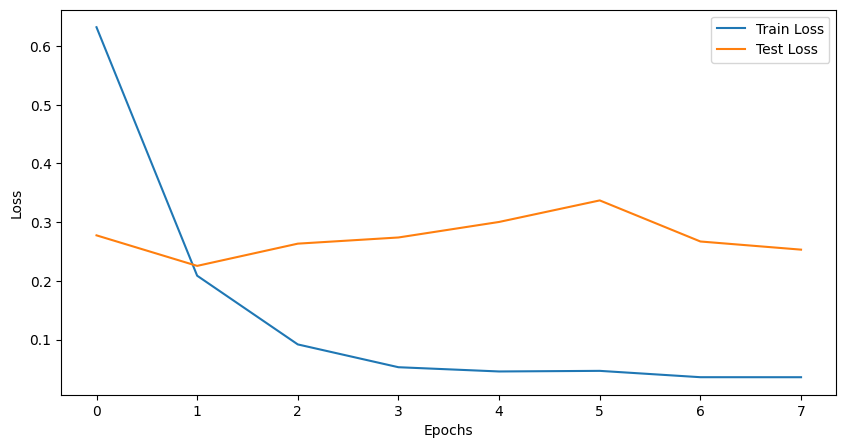

In [39]:
# プロット
plt.figure(figsize=(10, 5))
plt.plot(train_loss_list, label='Train Loss')
plt.plot(test_loss_list, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [42]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [44]:
# モデルの保存
torch.save(model.state_dict(), "/content/drive/My Drive/BERT/BERT_model_Livedoor_torch_V2.pth")


In [46]:
import torch
from transformers import BertTokenizer, BertModel
import torch.nn as nn

# BERT モデルのトークナイザーを読み込む
tokenizer = BertTokenizer.from_pretrained('cl-tohoku/bert-base-japanese-whole-word-masking')

# 分類したい新しいデータを用意する
text = df['text'][0]

# 新しいデータをトークナイズし、BERT モデルに入力する形式に変換する
encoded = tokenizer.encode_plus(
    text,
    add_special_tokens=True,
    max_length=512,
    padding='max_length',
    truncation=True,
    return_attention_mask=True,
    return_tensors='pt'  # 'pt' for PyTorch
)

# BERTモデルの読み込み
bert_model = BertModel.from_pretrained('cl-tohoku/bert-base-japanese-whole-word-masking')

# モデルの構築
class BertClassifier(nn.Module):
    def __init__(self, bert_model):
        super().__init__()
        self.bert_model = bert_model
        self.out = nn.Linear(bert_model.config.hidden_size, 9)

    def forward(self, input_ids, attention_mask):
        outputs = self.bert_model(input_ids=input_ids, attention_mask=attention_mask)
        logits = self.out(outputs.pooler_output)
        return logits

# モデルの初期化
loaded_model = BertClassifier(bert_model).to('cuda')

# 保存されたモデルの状態をロード
loaded_model.load_state_dict(torch.load("/content/drive/My Drive/BERT/BERT_model_Livedoor_torch_V2.pth"))

# 新しいデータを分類する
input_ids = encoded['input_ids']
attention_mask = encoded['attention_mask']
loaded_model.eval()
with torch.no_grad():
    outputs = loaded_model(input_ids.to('cuda'), attention_mask.to('cuda'))
    predictions = outputs

# ソフトマックス関数を適用して確率を取得
probabilities = torch.nn.functional.softmax(predictions, dim=1)

# 最も確率が高いラベルとその確率を取得
predicted_label = torch.argmax(probabilities, dim=1).item()
max_probability = torch.max(probabilities, dim=1).values.item()

print(f"Predicted label: {predicted_label}")
print(f"Confidence: {max_probability}")


The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'BertJapaneseTokenizer'. 
The class this function is called from is 'BertTokenizer'.
Some weights of the model checkpoint at cl-tohoku/bert-base-japanese-whole-word-masking were not used when initializing BertModel: ['cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertMode

Predicted label: 6
Confidence: 0.999481737613678


In [47]:
df['text'][0]

'26日深夜放送、TBS「S1」では、紆余曲折を経て、4月12日のセ・パ同時開幕が決まったプロ野球界について、野球解説者・野村克也氏がコメントを述べた。「我々が現役の時から、セとパがいがみ合うといったら言い方が悪いんですけど、そんな感じがしてたんですよ。日本シリーズとかオールスターとか、リーグを代表しているものはむき出しにしてやればいいので、試合を離れたら両リーグとも手を取り合っていい方向に進むという、そういう風にプロ野球はあって貰いたい」と語る野村氏。また、「組織というのは、ピラミッドっていうのが理想なんですから、トップがしっかりしてれば、少年野球、高校野球は始まってますけど、そういう底辺まで意思が通っているという、そういう組織を作り上げて貰いたい。特にプロ野球のコミッショナーはもっと権限を持ってほしい。足りない気がしますよ。選手の意見を聞いてとかなんとかって、コミッショナーなんだから、自分で“こうせいああせい”でいいと思うんですけどね」と訴える野村氏だった。'

In [48]:
df['label_index'][0]

6